/tmp/ipython-input-2691529967.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2691529967.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

=== TITANIC DATASET ANALYSIS ===
Dataset shape: (891, 9)
Survival rate: 38.4%
Female survival: 74.2%
Male survival: 18.9%
Class 1 survival: 63.0%
Class 2 survival: 47.3%
Class 3 survival: 24.2%

Top predictors of survival:
Sex: 0.543
Fare: 0.257
Embarked: -0.168
Pclass: -0.338


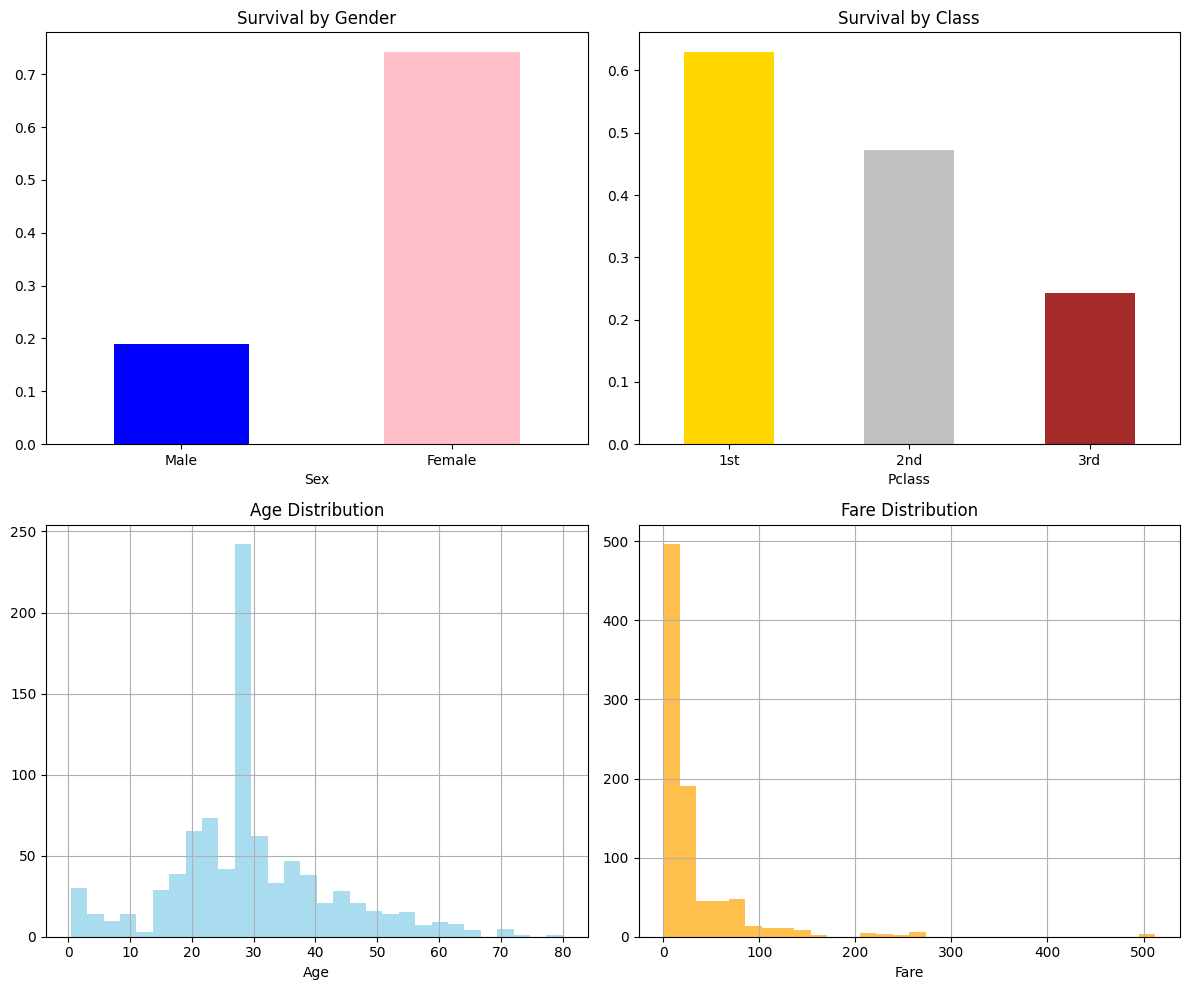


=== KEY FINDINGS ===
1. Women had much higher survival rates than men
2. Higher passenger classes survived more
3. Age and fare are moderate predictors of survival
4. Family size shows weak correlation with survival


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Data cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# EDA - Key insights
print("=== TITANIC DATASET ANALYSIS ===")
print(f"Dataset shape: {df.shape}")
print(f"Survival rate: {df['Survived'].mean()*100:.1f}%")
print(f"Female survival: {df[df['Sex']==1]['Survived'].mean()*100:.1f}%")
print(f"Male survival: {df[df['Sex']==0]['Survived'].mean()*100:.1f}%")

for pclass in [1, 2, 3]:
    rate = df[df['Pclass']==pclass]['Survived'].mean()*100
    print(f"Class {pclass} survival: {rate:.1f}%")

# Correlation analysis
corr = df.corr()['Survived'].sort_values(ascending=False)
print("\nTop predictors of survival:")
for feature, value in corr.items():
    if feature != 'Survived' and abs(value) > 0.1:
        print(f"{feature}: {value:.3f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Survival by gender
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0], color=['blue', 'pink'])
axes[0,0].set_title('Survival by Gender')
axes[0,0].set_xticklabels(['Male', 'Female'], rotation=0)

# Survival by class
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1], color=['gold', 'silver', 'brown'])
axes[0,1].set_title('Survival by Class')
axes[0,1].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# Age distribution
df['Age'].hist(bins=30, ax=axes[1,0], color='skyblue', alpha=0.7)
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

# Fare distribution
df['Fare'].hist(bins=30, ax=axes[1,1], color='orange', alpha=0.7)
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

# Key findings
print("\n=== KEY FINDINGS ===")
print("1. Women had much higher survival rates than men")
print("2. Higher passenger classes survived more")
print("3. Age and fare are moderate predictors of survival")
print("4. Family size shows weak correlation with survival")